<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.209032  29.469038  24.792376  ...  154.464670  154.506445 -0.041775
      1.0    95.182929  91.441961  90.514137  ...  287.141237  287.128065  0.013172
      2.0    42.767860  58.377914  28.139647  ...  139.296071  139.288906  0.007165
      3.0    87.954052  54.189062  93.178098  ...  245.269668  245.315826 -0.046158
      4.0    32.851740  61.573812  66.925648  ...  171.323142  171.330065 -0.006923
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   33.559909  60.224389  41.369734  ...  145.109496  145.136057 -0.026561
      26.0   54.090377  43.665621  96.432830  ...  204.206352  204.212734 -0.006382
      27.0   75.830293  74.765041  59.476288  ...  220.044153  220.054246 -0.010094
      28.0   24.855171  59.796667  55.485549  ...  150.104830  150.124807 -0.019978
      29.0   42.030646  47.662038  60.490646  ...  160.162191  160.186219 -0.024028

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.209032  29.469038  24.792376  ...  154.464670  154.506445 -0.041775
      1.0    95.182929  91.441961  90.514137  ...  287.141237  287.128065  0.013172
      2.0    42.767860  58.377914  28.139647  ...  139.296071  139.288906  0.007165
      3.0    87.954052  54.189062  93.178098  ...  245.269668  245.315826 -0.046158
      4.0    32.851740  61.573812  66.925648  ...  171.323142  171.330065 -0.006923
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   33.559909  60.224389  41.369734  ...  145.109496  145.136057 -0.026561
      26.0   54.090377  43.665621  96.432830  ...  204.206352  204.212734 -0.006382
      27.0   75.830293  74.765041  59.476288  ...  220.044153  220.054246 -0.010094
      28.0   24.855171  59.796667  55.485549  ...  150.104830  150.124807 -0.019978
      29.0   42.030646  47.662038  60.490646  ...  160.162191  160.186219 -0.024028

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.209032  29.469038  24.792376  ...  154.464670  154.506445 -0.041775
      1.0    95.182929  91.441961  90.514137  ...  287.141237  287.128065  0.013172
      2.0    42.767860  58.377914  28.139647  ...  139.296071  139.288906  0.007165
      3.0    87.954052  54.189062  93.178098  ...  245.269668  245.315826 -0.046158
      4.0    32.851740  61.573812  66.925648  ...  171.323142  171.330065 -0.006923
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   33.559909  60.224389  41.369734  ...  145.109496  145.136057 -0.026561
      26.0   54.090377  43.665621  96.432830  ...  204.206352  204.212734 -0.006382
      27.0   75.830293  74.765041  59.476288  ...  220.044153  220.054246 -0.010094
      28.0   24.855171  59.796667  55.485549  ...  150.104830  150.124807 -0.019978
      29.0   42.030646  47.662038  60.490646  ...  160.162191  160.186219 -0.024028

[30000 rows x 7 columns]

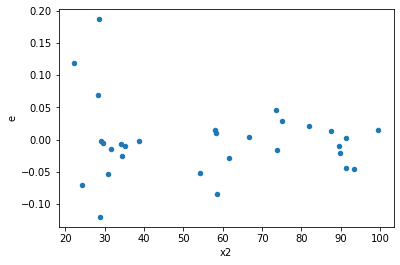

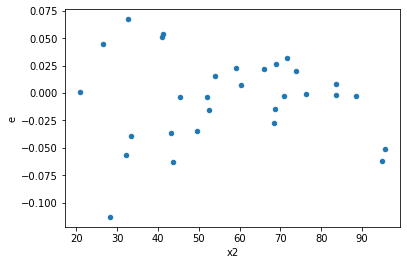

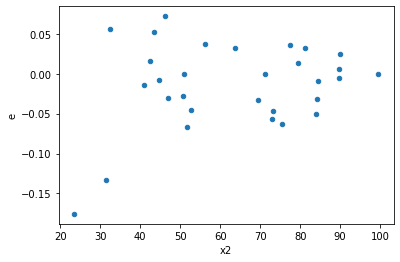

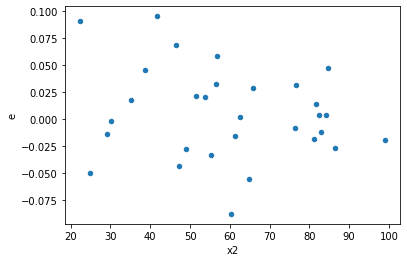

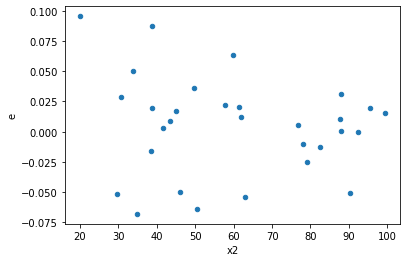

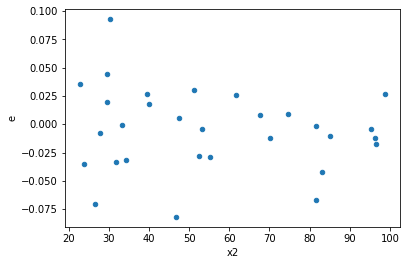

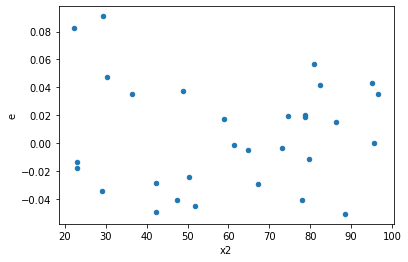

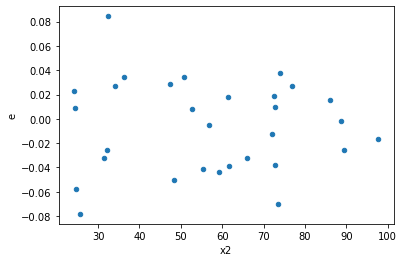

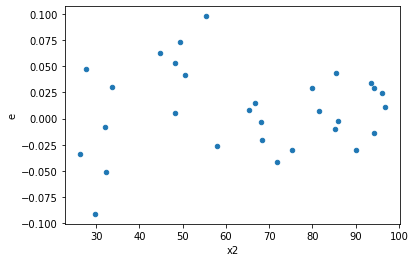

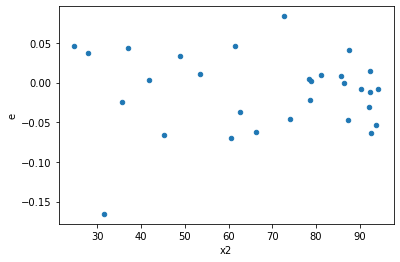

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
25.0,9.0,9.0,0.01473942752913726,0.01912243999008649,0.00163771416990414,0.0021247155544540544,1.2973665328782127,0.7044581731698312,0.6477709134150844,0.3522290865849156,Reject001=1 : Homoscedasticity
43.0,9.0,9.0,0.009775874016561137,0.01212420902393453,0.0010862082240623485,0.0013471343359927257,1.240217396766276,0.7536674704682902,0.6231662647658549,0.3768337352341451,Reject001=1 : Homoscedasticity
52.0,9.0,9.0,0.012399590671233028,0.012708432475249097,0.0013777322968036698,0.0014120480528054553,1.0249074193015566,0.9713668618413869,0.5143165690793066,0.48568343092069344,Reject001=1 : Homoscedasticity
116.0,9.0,9.0,0.009094847666820624,0.010429577110072287,0.001010538629646736,0.001158841901119143,1.1467566574117516,0.8417036117075216,0.5791481941462392,0.4208518058537608,Reject001=1 : Homoscedasticity
136.0,9.0,9.0,0.017171448784964526,0.017552663728216678,0.0019079387538849474,0.001950295969801853,1.0222005113270318,0.9744435960731919,0.5127782019634041,0.48722179803659593,Reject001=1 : Homoscedasticity
170.0,9.0,9.0,0.027477636858368792,0.02748797166149845,0.003053070762040977,0.0030542190734998277,1.000376116883083,0.9995622429006206,0.5002188785496897,0.4997811214503103,Reject001=1 : Homoscedasticity
192.0,9.0,9.0,0.01322086993181009,0.017964282317534223,0.001468985547978899,0.0019960313686149134,1.3587821686613253,0.6552622742704559,0.672368862864772,0.32763113713522796,Reject001=1 : Homoscedasticity
217.0,9.0,9.0,0.011450226886543978,0.012204554404195402,0.0012722474318382197,0.0013560616004661557,1.0658788271294337,0.9258437251502756,0.5370781374248622,0.4629218625751378,Reject001=1 : Homoscedasticity
244.0,9.0,9.0,0.004351858075319442,0.012221501454038204,0.00048353978614660464,0.0013579446060042449,2.80834099883671,0.1399809292184946,0.9300095353907527,0.0699904646092473,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0674447229984465,0.006152118290278834,0.0074938581109385005,0.0006835686989198704,0.0912171926396753,0.0014603621319381655,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,0.031441779277103274,0.004156406719670558,0.0034935310307892525,0.00046182296885228423,0.1321937503294339,0.005928800091827443,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,0.03786553119795693,0.007229077065951406,0.004207281244217436,0.0008032307851057118,0.19091445008809116,0.02148565605394317,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.021297075052576095,0.008693279248801486,0.002366341672508455,0.0009659199165334985,0.40819122942189884,0.19810836136836163,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.02424941968454415,0.004908593508598226,0.00269437996494935,0.0005453992787331362,0.20242107120306949,0.02608361248562402,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.008705297175974954,0.003111914889458748,0.0009672552417749949,0.000345768321050972,0.3574737112992616,0.1414250020425066,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.020974647084683957,0.01031949074473001,0.002330516342742662,0.0011466100827477788,0.49199830171471526,0.3055571004967549,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.02297950772060489,0.010095914236284446,0.0025532786356227658,0.0011217682484760496,0.43934423483022683,0.23635197559266663,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.01090107096068997,0.002467575100487478,0.00121123010674333,0.00027417501116527534,0.22636079605258305,0.03742000407904056,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      732
Reject001=0 : Heteroscedasticity    268
Name: Result_test, dtype: int64